# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

## Step 1. 문제 정의 및 가설 설정하기


- 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악

    - 어떤 행동 패턴이 서비스 구독 연장에 영향을 미치는가?   
    - 유저들의 학습 습관, 선호도, 이용 행태는 어떻게 구독 결정에 영향을 미치는가?   
   
   
- 가설 설정   
    1. 사용자가 학습 플랫폼을 많이 이용할수록 구독을 연장할 가능성이 높다.
         - 월간 활동적인 학습 일수, 완료한 총 코스 수, 평균 학습 세션 시간 등이 높을수록 구독 연장 확률이 높다.

    2. 커뮤니티 참여도가 높을수록 구독을 연장할 가능성이 높다.


## 데이터 분석 기본 세팅 하기

    - 1. 데이터 불러오기
    - 2. 데이터 확인
    - 3. 데이터 기본 정보 확인
    - 4. 데이터 통계 요약 확인

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import folium
from folium.plugins import MarkerCluster

In [7]:
# 데이터 로드
access_data = pd.read_csv('data/mini.csv',sep=',')

In [253]:
# 데이터 확인
access_data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,login_time_bins
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0,11-15
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1,16-20
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1,16-20
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1,16-20
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1,21-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1,11-15
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1,16-20
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1,16-20
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1,16-20


In [266]:
# 결측치, Datatype 확인
access_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [641]:
access_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


## 데이터 전처리

- 커뮤니티 참여를 기준으로 알아보고자 한다.

In [299]:
# 1. 커뮤니티 참여도별 유저 수 구하기
community_user = access_data.groupby('community_engagement_level')['user_id'].count()
community_user

community_engagement_level
1     559
2    1219
3    1588
4    2070
5    4564
Name: user_id, dtype: int64

In [297]:
# 2. 커뮤니티 참여도별 월간 활동적인 학습 일수 평균 구하기
community_act = access_data.groupby('community_engagement_level')['monthly_active_learning_days'].mean()
community_act

community_engagement_level
1    12.688730
2    12.755537
3    12.112720
4    12.653623
5    12.573181
Name: monthly_active_learning_days, dtype: float64

In [301]:
# 3. 커뮤니티 참여도별 완료한 총 코스 수 평균 구하기
community_completed = access_data.groupby('community_engagement_level')['total_completed_courses'].mean()
community_completed

community_engagement_level
1     9.919499
2    11.047580
3    11.351385
4    12.255072
5    13.117660
Name: total_completed_courses, dtype: float64

In [303]:
# 4. 커뮤니티 참여도별 최근 학습 성취도 구하기
community_achievement = access_data.groupby('community_engagement_level')['recent_learning_achievement'].mean()
community_achievement

community_engagement_level
1    74.820052
2    74.782313
3    75.426017
4    75.133346
5    74.936138
Name: recent_learning_achievement, dtype: float64

- 타겟별로 알아보자

In [329]:
# 1. 타겟별 유저 수 구하기
target_user = access_data.groupby('target')['user_id'].count()
target_user

target
0    3801
1    6199
Name: user_id, dtype: int64

In [331]:
# 2. 타겟별 월간 활동적인 학습 일수 평균 구하기
target_act = access_data.groupby('target')['monthly_active_learning_days'].mean()
target_act

target
0    12.502236
1    12.571866
Name: monthly_active_learning_days, dtype: float64

In [333]:
# 3. 완료한 총 코스 수 평균 구하기
targe_completed = access_data.groupby('target')['total_completed_courses'].mean()
targe_completed

target
0    12.246251
1    12.216003
Name: total_completed_courses, dtype: float64

In [335]:
# 4. 최근 학습 성취도 평균 구하기
targe_achievement = access_data.groupby('target')['recent_learning_achievement'].mean()
targe_achievement

target
0    75.000310
1    75.047419
Name: recent_learning_achievement, dtype: float64

## 커뮤니티별 그래프로 시각화 해보기

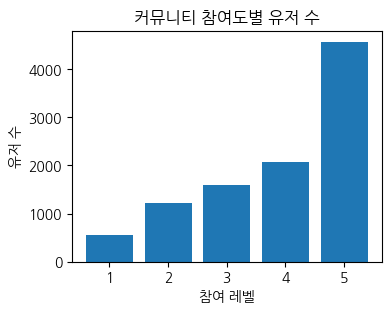

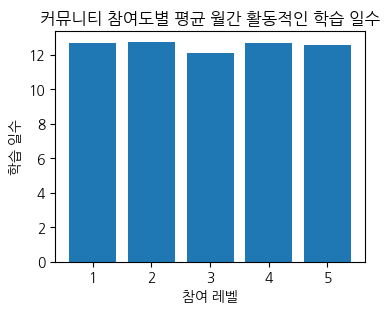

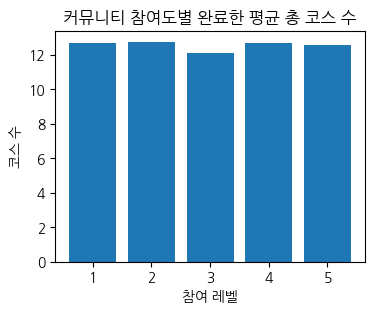

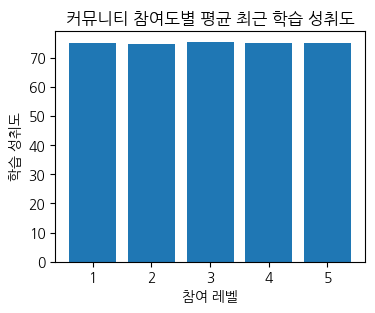

In [369]:
# 1. 커뮤니티 참여도별 유저 수

plt.figure(figsize=(4,3))

#그래프 x축 y축
plt.bar(community_user.index, community_user.values)

#그래프 명
plt.title('커뮤니티 참여도별 유저 수')

plt.xlabel('참여 레벨')
plt.ylabel('유저 수')
plt.xticks()
plt.show()


# 2. 커뮤니티 참여도별 월간 활동적인 학습 일수

plt.figure(figsize=(4,3))

#그래프 x축 y축
plt.bar(community_act.index, community_act.values)

#그래프 명
plt.title('커뮤니티 참여도별 평균 월간 활동적인 학습 일수')

plt.xlabel('참여 레벨')
plt.ylabel('학습 일수')
plt.xticks()
plt.show()


# 3. 커뮤니티 참여도별 완료한 총 코스 수

plt.figure(figsize=(4,3))

#그래프 x축 y축
plt.bar(community_monact.index, community_monact.values)

#그래프 명
plt.title('커뮤니티 참여도별 완료한 평균 총 코스 수')


plt.xlabel('참여 레벨')
plt.ylabel('코스 수')
plt.xticks()
plt.show()


# 4. 커뮤니티 참여도별 최근 학습 성취도

plt.figure(figsize=(4,3))

#그래프 x축 y축
plt.bar(community_achievement.index, community_achievement.values)

#그래프 명
plt.title('커뮤니티 참여도별 평균 최근 학습 성취도')

plt.xlabel('참여 레벨')
plt.ylabel('학습 성취도')
plt.xticks()
plt.show()

커뮤니티 참여도가 5수준의 그룹의 유저수가 월등히 많으나 학습 일수, 완료한 코스, 학습 성취도상 참여 레벨별로 큰 차이가 보이지 않았다. 다른 분석이 추가적으로 필요해 보인다.

## target별 그래프로 시각화 해보기

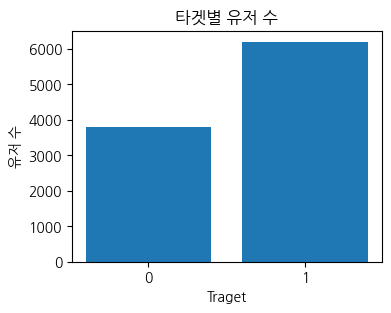

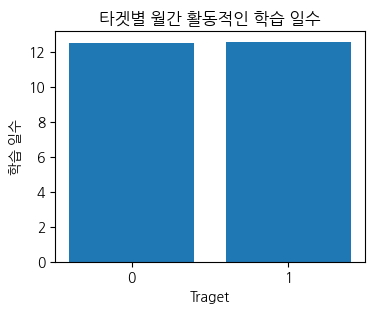

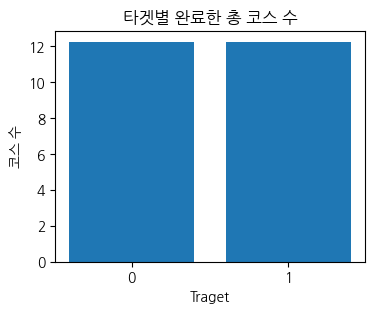

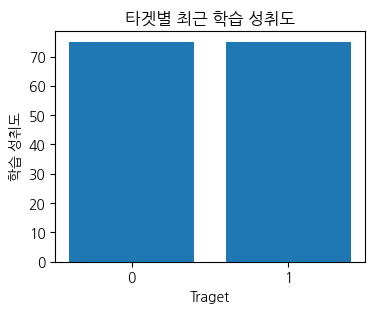

In [402]:
# 1. 타겟별 유저 수

plt.figure(figsize=(4,3))

#그래프 x축 y축
plt.bar(target_user.index, target_user.values)

#그래프 명
plt.title('타겟별 유저 수')

plt.xlabel('Traget')
plt.ylabel('유저 수')
plt.xticks([0, 1])
plt.show()


# 2. 타겟별 월간 활동적인 학습 일수

plt.figure(figsize=(4,3))

#그래프 x축 y축
plt.bar(target_act.index, target_act.values)

#그래프 명
plt.title('타겟별 월간 활동적인 학습 일수')

plt.xlabel('Traget')
plt.ylabel('학습 일수')
plt.xticks([0, 1])
plt.show()


# 3. 타겟별 완료한 총 코스 수

plt.figure(figsize=(4,3))

#그래프 x축 y축
plt.bar(targe_completed.index, targe_completed.values)

#그래프 명
plt.title('타겟별 완료한 총 코스 수')


plt.xlabel('Traget')
plt.ylabel('코스 수')
plt.xticks([0, 1])
plt.show()


# 4. 타겟별 최근 학습 성취도

plt.figure(figsize=(4,3))
#그래프 x축 y축
plt.bar(targe_achievement.index, targe_achievement.values)

#그래프 명
plt.title('타겟별 최근 학습 성취도')

plt.xlabel('Traget')
plt.ylabel('학습 성취도')
plt.xticks([0, 1])
plt.show()

위와 동일한 기준으로 타겟별로 살펴 보았으나 이렇게 하면 제대로 그래프가 안 보인다.   
target1과0을 나눠서 다시 살펴보자.

In [499]:
#커뮤니티 참여도별 target

community_engagement_target_1 = access_data[access_data['target'] == 1].groupby('community_engagement_level').size()
community_engagement_target_0 = access_data[access_data['target'] == 0].groupby('community_engagement_level').size()


In [501]:
community_engagement_target_1

community_engagement_level
1     348
2     751
3     968
4    1265
5    2867
dtype: int64

In [503]:
community_engagement_target_0

community_engagement_level
1     211
2     468
3     620
4     805
5    1697
dtype: int64

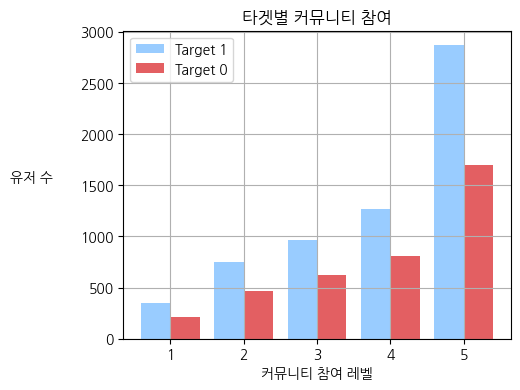

In [564]:
# 막대 그래프로 시각화
plt.figure(figsize=(5, 4))

# Target 1 막대 그래프
plt.bar(community_engagement_target_1.index - 0.2, community_engagement_target_1.values, width=0.4, label='Target 1', color='#99ccff')

# Target 0 막대 그래프
plt.bar(community_engagement_target_0.index + 0.2, community_engagement_target_0.values, width=0.4, label='Target 0', color='#e35f62')

# X 축 눈금 조정

plt.title('타겟별 커뮤니티 참여')
plt.xlabel('커뮤니티 참여 레벨')
plt.ylabel('유저 수', labelpad=35, rotation=360)
plt.legend()
plt.grid(True)
plt.show()

- 위와 같이 나눠서 target의 두 그룹을 비교하면서 더 알아보자.

In [529]:
# 타겟별 월간 활동적인 학습 일수

monthly_active_learning_days_target_1 = access_data[access_data['target'] == 1].groupby('monthly_active_learning_days').size()
monthly_active_learning_days_target_0 = access_data[access_data['target'] == 0].groupby('monthly_active_learning_days').size()


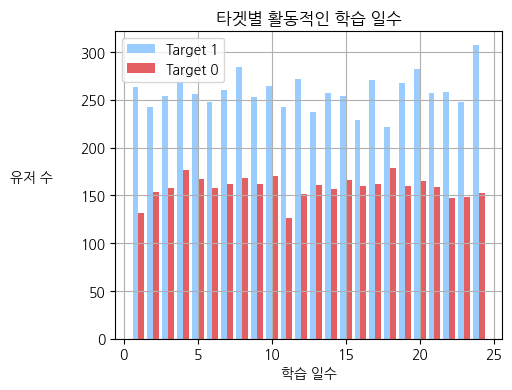

In [531]:
# 막대 그래프로 시각화
plt.figure(figsize=(5, 4))

# Target 1 막대 그래프
plt.bar(monthly_active_learning_days_target_1.index - 0.2, monthly_active_learning_days_target_1.values, width=0.4, label='Target 1', color='#99ccff')

# Target 0 막대 그래프
plt.bar(monthly_active_learning_days_target_0.index + 0.2, monthly_active_learning_days_target_0.values, width=0.4, label='Target 0', color='#e35f62')

# X 축 눈금 조정

plt.title('타겟별 활동적인 학습 일수')
plt.xlabel('학습 일수')
plt.ylabel('유저 수', labelpad=35, rotation=360)
plt.legend()
plt.grid(True)
plt.show()

In [547]:
# 타겟별 완료한 총 코스 수

total_completed_coursest_target_1 = access_data[access_data['target'] == 1].groupby('total_completed_courses').size()
total_completed_coursest_target_0 = access_data[access_data['target'] == 0].groupby('total_completed_courses').size()

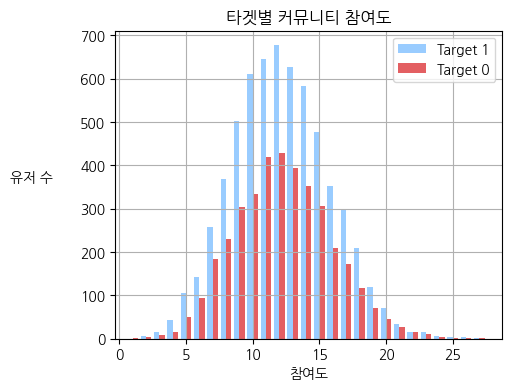

In [555]:
# 막대 그래프로 시각화
plt.figure(figsize=(5, 4))

# Target 1 막대 그래프
plt.bar(total_completed_coursest_target_1.index - 0.2, total_completed_coursest_target_1.values, width=0.4, label='Target 1', color='#99ccff')

# Target 0 막대 그래프
plt.bar(total_completed_coursest_target_0.index + 0.2, total_completed_coursest_target_0.values, width=0.4, label='Target 0', color='#e35f62')

# X 축 눈금 조정
plt.title('타겟별 커뮤니티 참여도')
plt.xlabel('참여도')
plt.ylabel('유저 수', labelpad=35, rotation=360)
plt.legend()
plt.grid(True)
plt.show()

target 두 그룹의 전체 사용자의 비율에 따른 차이만 보일뿐 유의미한 분석이 아직 보이질 않는다. 위의 가설로 돌아가서 구독연장을 기준으로 데이터를 분석해보자.

- 가설 설정   
    1. 사용자가 학습 플랫폼을 많이 이용할수록 구독을 연장할 가능성이 높다.
         - 월간 활동적인 학습 일수, 완료한 총 코스 수, 평균 학습 세션 시간 등이 높을수록 구독 연장 확률이 높다.

    2. 커뮤니티 참여도가 높을수록 구독을 연장할 가능성이 높다.


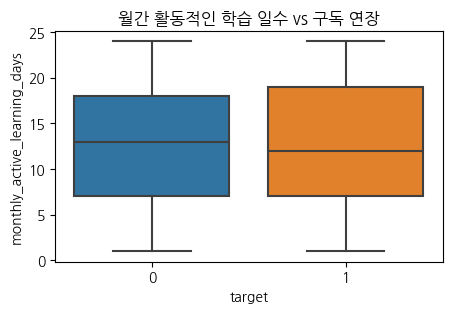

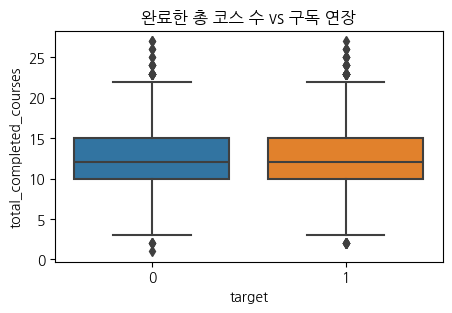

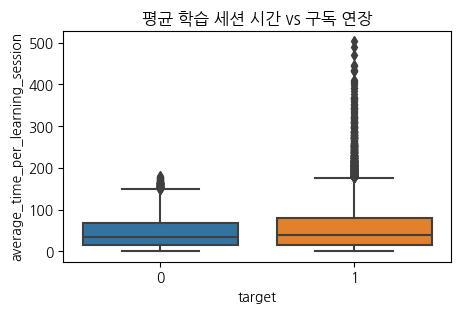

In [620]:
#가설1. 사용자가 학습 플랫폼을 많이 이용할수록 구독을 연장할 가능성이 높다.
#         월간 활동적인 학습 일수, 완료한 총 코스 수, 평균 학습 세션 시간 등이 높을수록 구독 연장 확률이 높다.

# 월간 활동적인 학습 일수 vs. 구독 연장
plt.figure(figsize=(5, 3))
sns.boxplot(x='target', y='monthly_active_learning_days', data=access_data)
plt.title('월간 활동적인 학습 일수 vs 구독 연장')
plt.show()

# 완료한 총 코스 수 vs. 구독 연장
plt.figure(figsize=(5, 3))
sns.boxplot(x='target', y='total_completed_courses', data=access_data)
plt.title('완료한 총 코스 수 vs 구독 연장')
plt.show()

# 평균 학습 세션 시간 vs. 구독 연장
plt.figure(figsize=(5, 3))
sns.boxplot(x='target', y='average_time_per_learning_session', data=access_data)
plt.title('평균 학습 세션 시간 vs 구독 연장')
plt.show()

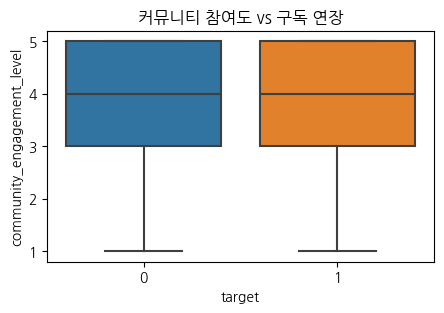

In [617]:
# 가설2. 커뮤니티 참여도 vs. 구독 연장
plt.figure(figsize=(5,3))
sns.boxplot(x='target', y='community_engagement_level', data=access_data)
plt.title('커뮤니티 참여도 vs 구독 연장')
plt.show()

결론

가설을 검증하는 데이터가 나오길 기대했으나,   
대부분의 데이터에서는 target 두 그룹의 유저가 비슷한 양상을 보였고, 뚜렷한 차이점을 발견 할 수 없었다.   
커뮤니티 레벨이 단계가 높을수록 유저 수도 많았는데, 더 높은 레벨을 만들어 인플루언서 같은 제도를 둬도 재밌을것 같다.

구독 연장을 기준으로 한 데이터에서는 유일하게   
평균 학습 세션 시간에 따른 차이가 눈에 띄였는데 학습 시간이 구독에 유의미한 결과를 보여주고 있다.
따라서 학습시간별 보상이 이루어 지면 전체적으로 학습 시간이 올라가고, 따라서 구독을 유지하는 유저가 늘어날 것으로 기대된다.

     
   
아래는 내가 원했던 결론이었으나 원하는만큼 분석, 도출하진 못했다.   
꾸준한 데이터 수집과 AB테스트 등이 필요하다.
- 활동적인 학습 일수, 커뮤니티 참여도가 높은 유저는 구독을 연장할 가능성이 높다.
- 최근 학습 성취도가 높은 유저는 구독을 연장할 가능성이 높다.
- 따라서 커뮤니티 참여도에 따른 보상으로 인해 유저의 참여도를 더 높이는 방안을 마련해야 한다.


매우 미흡하고 두서없었지만
이상입니다.